## 5.11
### a

In [1]:
import numpy as np
import pandas as pd

x1 = [0.48, 40.53, 2.19, 0.55, 0.74, 0.66, 0.93, 0.37, 0.22]
x2 = [12.57, 73.68, 11.13, 20.03, 20.29, 0.78, 4.64, 0.43, 1.08]

df = pd.DataFrame({'Cr': x1, 'Se': x2})

In [2]:
print(f"mean:{df.mean()}")
print(f"covariance:\n{df.cov()}")

mean:Cr     5.185556
Se    16.070000
dtype: float64
covariance:
            Cr        Se
Cr  176.004178  287.2412
Se  287.241200  527.8493


eigenvalues:[ 15.09405864 688.75941914]
eigenvectors:
[[-0.87243473 -0.48873064]
 [ 0.48873064 -0.87243473]]
f_value:3.2574420510913775
height:3.5337114380780736
width:23.870517885566635


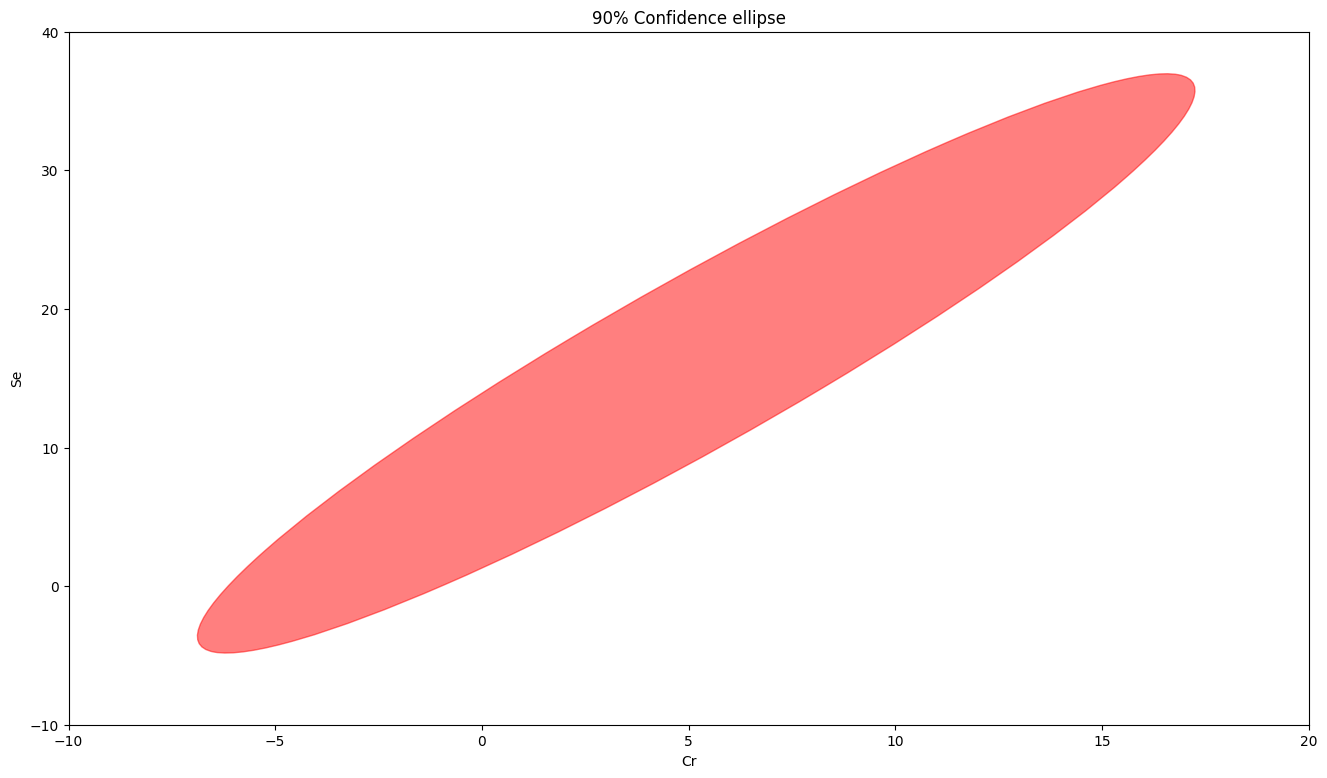

In [3]:
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import f, chi2
from copy import copy

def get_eig(df):
    eig = np.linalg.eig(df.cov())
    return eig
eig = get_eig(df)
print(f"eigenvalues:{eig[0]}")
print(f"eigenvectors:\n{eig[1]}")
p = 2
n = 9
def get_f(p, n):
    f_v = f.ppf(0.9, p, n-p)
    return f_v
f_value = get_f(p, n)
print(f"f_value:{f_value}")
def get_height_width(p, n, f_value, eig):
    return 2 * np.sqrt( p * (n - 1) / (n * (n - p)) * f_value * eig[0])
height, width = get_height_width(p, n, f_value, eig)
def get_degree(eig):
    return float(np.degrees(np.arctan(eig[1][0, 0]/ eig[1][0, 1])))
print(f"height:{height/2}")
print(f"width:{width/2}")
def get_ell(df, width, height, eig):
    return Ellipse(xy=df.mean(axis=0),
              width=width, height=height,
              angle=get_degree(eig)
              )
ell = get_ell(df, width, height, eig)
ell.set_facecolor('red')
ell.set_edgecolor('red')
ell.set_alpha(0.5)
fig, ax = plt.subplots(figsize=(16, 9))
ax.add_artist(copy(ell))
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 40)
ax.set_xlabel('Cr')
ax.set_ylabel('Se')
ax.set_title('90% Confidence ellipse')
plt.savefig("5.11a.svg")

### b

cr_low:-6.881173303648506
cr_high:17.252284414759618
se_low:-4.826956603563399
se_high:36.9669566035634


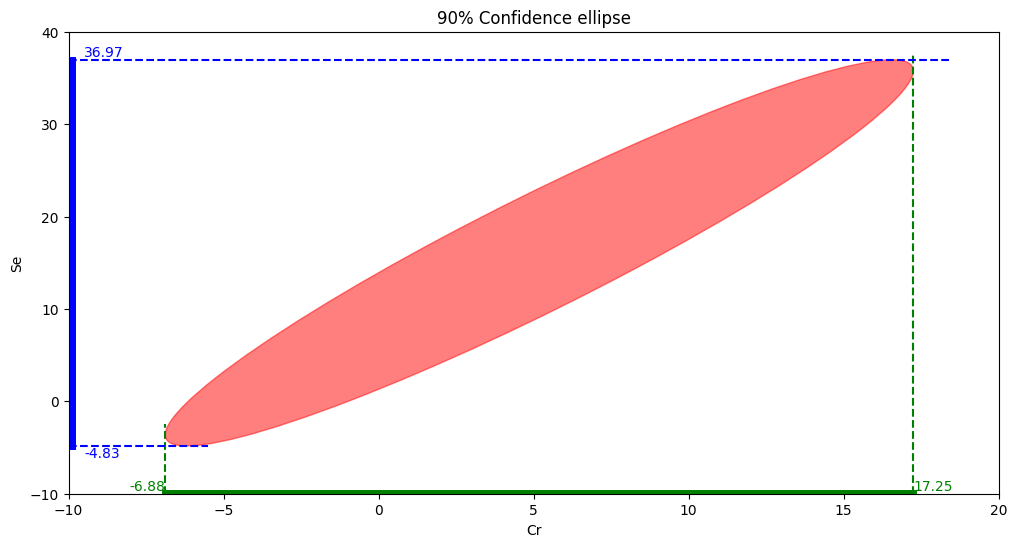

In [4]:
cr_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[0, 0])
cr_low = df.mean()[0] - cr_c
cr_high = df.mean()[0] + cr_c
print(f"cr_low:{cr_low}")
print(f"cr_high:{cr_high}")
se_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df.cov().values[1, 1])
se_low = df.mean()[1] - se_c
se_high = df.mean()[1] + se_c
print(f"se_low:{se_low}")
print(f"se_high:{se_high}")

fig, ax = plt.subplots(figsize=(12, 6))
ax.add_artist(copy(ell))
ax.set_xlim(-10, 20)
ax.set_ylim(-10, 40)
ax.set_xlabel('Cr')
ax.set_ylabel('Se')
ax.set_title('90% Confidence ellipse')
ax.axvline(cr_low, 0, 0.15, color='green', ls='--')
ax.axvline(cr_high, 0, 0.95, color='green', ls='--')
ax.axhline(se_low, 0, 0.15, color='blue', ls='--')
ax.axhline(se_high, 0, 0.95, color='blue', ls='--')
ax.text(cr_low, -10, f"{cr_low:.2f}", color='green', va='bottom', ha='right')
ax.text(cr_high, -10, f"{cr_high:.2f}", color='green', va='bottom', ha='left')
ax.text(-9.5, se_low, f"{se_low:.2f}", color='blue', va='top', ha='left')
ax.text(-9.5, se_high, f"{se_high:.2f}", color='blue', va='bottom', ha='left')
ax.add_line(plt.Line2D([cr_low, cr_high], [-9.9, -9.9], color='green', linewidth=5))
ax.add_line(plt.Line2D([-9.9, -9.9], [se_low, se_high], color='blue', linewidth=5))
plt.savefig("5.11b.svg")

### c

In [5]:
def get_d2_y(df):
    d2 = np.zeros(df.shape[0])
    for i in range(df.shape[0]):
        d2[i] = np.dot(np.dot(df.iloc[i, :].values - df.mean(axis=0).values, np.linalg.inv(df.cov())), df.iloc[i, :].values - df.mean(axis=0).values)
    d2_sort = np.sort(d2)
    y = np.zeros(df.shape[0])
    for j in range(df.shape[0]):
        y[j] = chi2.ppf((j + 1 / 2) / (df.shape[0]), p)
    return d2_sort, y
d2_sort, y = get_d2_y(df)

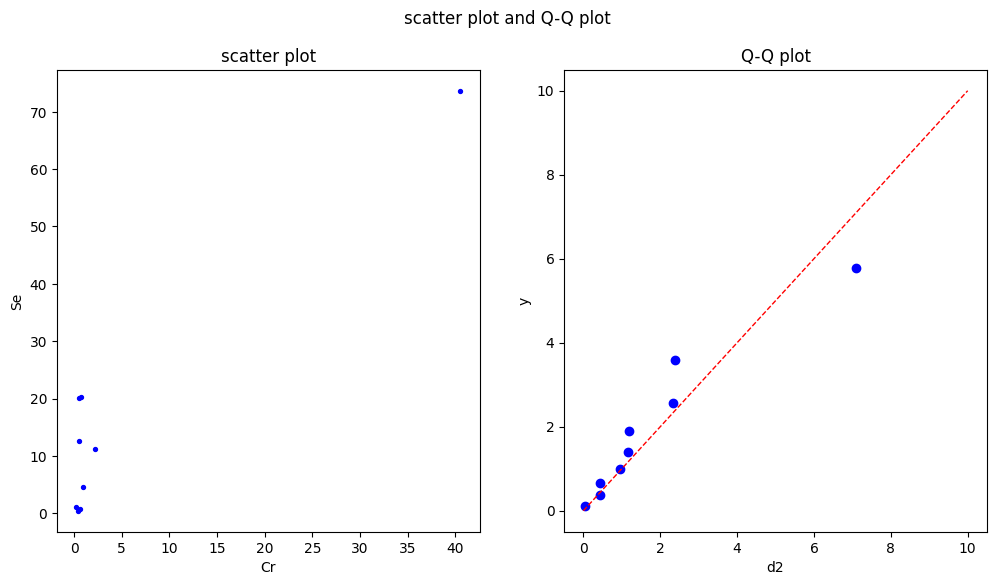

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("scatter plot and Q-Q plot")
ax1.scatter(df['Cr'], df['Se'], color="blue", s=8)
ax1.set_xlabel('Cr')
ax1.set_ylabel('Se')
ax1.set_title('scatter plot')
ax2.scatter(d2_sort, y, color="blue")
ax2.set_xlabel('d2')
ax2.set_ylabel('y')
ax2.add_line(plt.Line2D([0, 10], [0, 10], color='red', linewidth=1, linestyle='--'))
ax2.set_title('Q-Q plot')
plt.savefig("5.11c.svg")

### d

In [7]:
df_new = df.drop(1, axis=0)

In [8]:
print(f"mean:{df_new.mean()}")
print(f"covariance:\n{df_new.cov()}")

mean:Cr    0.76750
Se    8.86875
dtype: float64
covariance:
          Cr         Se
Cr  0.378564   1.030282
Se  1.030282  69.859755


In [9]:
eig_new = get_eig(df_new)
print(f"eigenvalues:{eig_new[0]}")
print(f"eigenvectors:\n{eig_new[1]}")

eigenvalues:[ 0.3632904  69.87502925]
eigenvectors:
[[-0.99989013 -0.01482333]
 [ 0.01482333 -0.99989013]]


f_value:3.4633040700956514
height:0.6057810305095946
width:8.401362271243821
cr_low:0.14911559216273196
cr_high:1.3858844078372683
se_low:0.46830600020165036
se_high:17.269193999798354


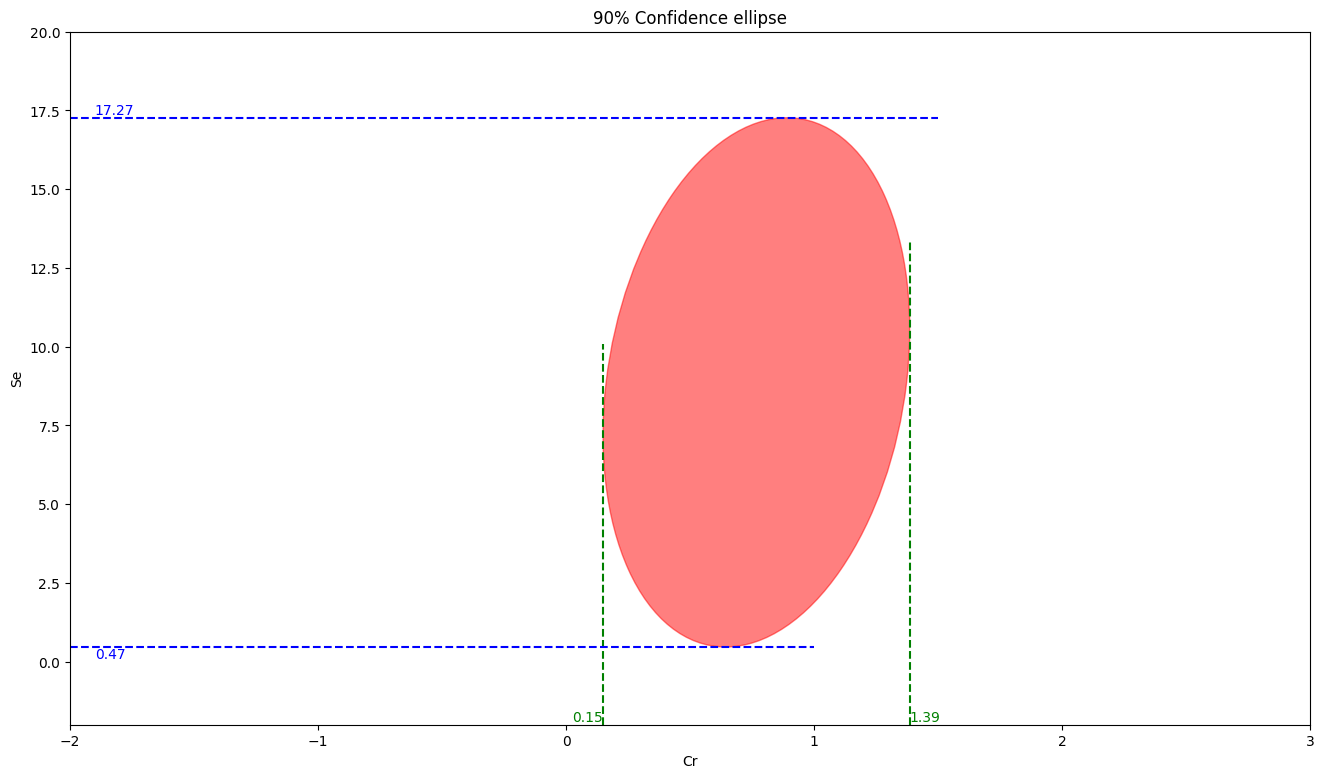

In [10]:
p = 2
n = 8
f_value = get_f(p, n)
print(f"f_value:{f_value}")
height, width = get_height_width(p, n, f_value, eig_new)
print(f"height:{height/2}")
print(f"width:{width/2}")
ell_new = get_ell(df_new, width, height, eig_new)
ell_new.set_facecolor('red')
ell_new.set_edgecolor('red')
ell_new.set_alpha(0.5)

cr_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df_new.cov().values[0, 0])
cr_low = df_new.mean()[0] - cr_c
cr_high = df_new.mean()[0] + cr_c
print(f"cr_low:{cr_low}")
print(f"cr_high:{cr_high}")
se_c = np.sqrt(p * (n - 1) / (n * (n - p)) * f_value * df_new.cov().values[1, 1])
se_low = df_new.mean()[1] - se_c
se_high = df_new.mean()[1] + se_c
print(f"se_low:{se_low}")
print(f"se_high:{se_high}")

fig, ax = plt.subplots(figsize=(16, 9))
ax.add_artist(copy(ell_new))
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 20)
ax.set_xlabel('Cr')
ax.set_ylabel('Se')
ax.set_title('90% Confidence ellipse')
ax.axvline(cr_low, 0, 0.55, color='green', ls='--')
ax.axvline(cr_high, 0, 0.7, color='green', ls='--')
ax.axhline(se_low, 0, 0.6, color='blue', ls='--')
ax.axhline(se_high, 0, 0.7, color='blue', ls='--')
ax.text(cr_low, -2, f"{cr_low:.2f}", color='green', va='bottom', ha='right')
ax.text(cr_high, -2, f"{cr_high:.2f}", color='green', va='bottom', ha='left')
ax.text(-1.9, se_low, f"{se_low:.2f}", color='blue', va='top', ha='left')
ax.text(-1.9, se_high, f"{se_high:.2f}", color='blue', va='bottom', ha='left')
ax.add_line(plt.Line2D([cr_low, cr_high], [-9.9, -9.9], color='green', linewidth=5))
ax.add_line(plt.Line2D([-9.9, -9.9], [se_low, se_high], color='blue', linewidth=5))
plt.savefig("5.11d.svg")

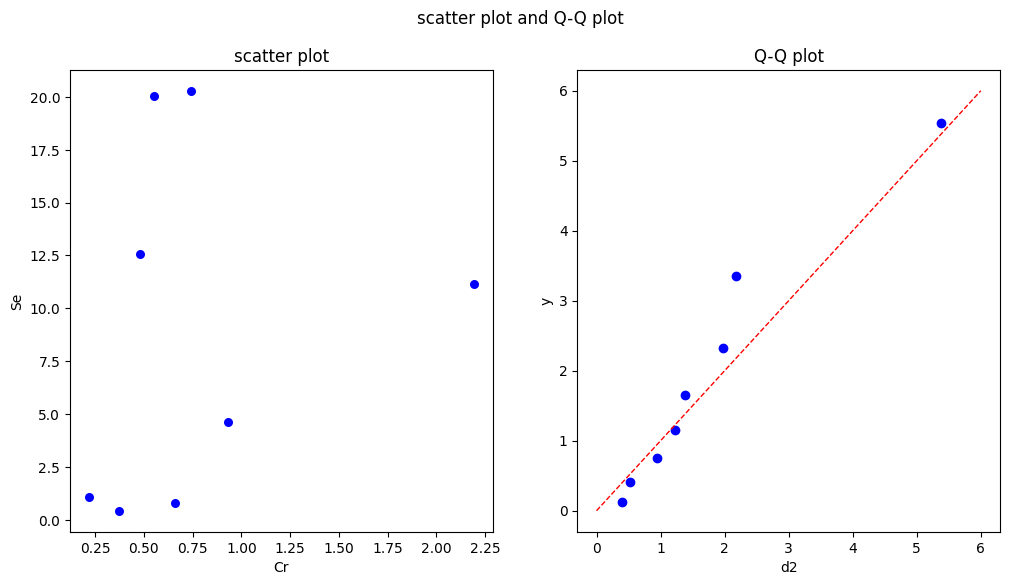

In [11]:
d2_sort, y = get_d2_y(df_new)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle("scatter plot and Q-Q plot")
ax1.scatter(df_new['Cr'], df_new['Se'], color="blue", s=30)
ax1.set_xlabel('Cr')
ax1.set_ylabel('Se')
ax1.set_title('scatter plot')
ax2.scatter(d2_sort, y, color="blue")
ax2.set_xlabel('d2')
ax2.set_ylabel('y')
ax2.add_line(plt.Line2D([0, 6], [0, 6], color='red', linewidth=1, linestyle='--'))
ax2.set_title('Q-Q plot')
plt.savefig("5.11d2.svg")